In [16]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In this notebook we develop a method to solve ODE's using Neural networks. Creating this notebook, we have not looked at any theory or publications. It is meant as an exercise.

Classical ODE's can be expressed in terms of their Hamiltonian: $Hf=0$, where $H$ can be (for example) the nonlinear pendulum equation:

$$\frac{d^2\theta}{dt^2}+\frac gL\sin(\theta)=0$$
$$f(0)=1$$

The latter we will first solve using a numeric ODE solver, then we try to mimick the result using neural networks

* It turned out that this idea is a field of research called Physics-Informed Neural Networks. I am a little late to the party!

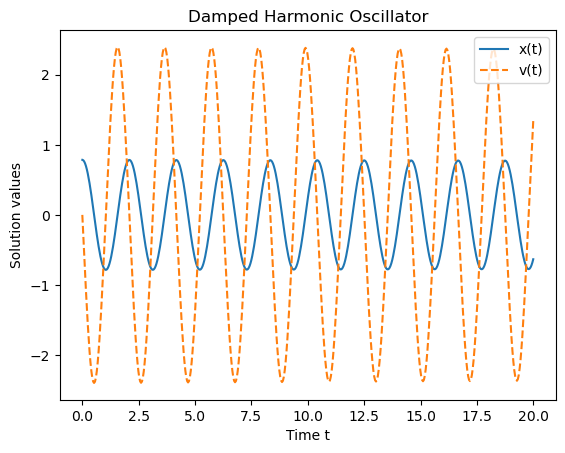

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
beta = 0.1  # damping coefficient
omega = 1.0  # natural frequency

g = 9.81
L = 1

# Define the system of first-order equations
def nonlinear_pendulum(t, y, g=g, L=L):
    theta, omega = y  # y is an array where y[0] = x and y[1] = v
    dtheta_dt = omega
    domega_dt = -g/L*np.sin(theta)
    return [dtheta_dt, domega_dt]

# Initial conditions
theta0 = np.pi / 4  # 45 degrees
omega0 = 0.0        # initially at rest
y0 = [theta0, omega0]

t_span = (0, 20)
t_eval = np.linspace(0, 20, 500)  # Points at which to store the solution

solution = solve_ivp(nonlinear_pendulum, t_span, y0, t_eval=t_eval)

plt.plot(solution.t, solution.y[0], label='x(t)')  # x(t)
plt.plot(solution.t, solution.y[1], label='v(t)', linestyle='--')  # v(t)
plt.xlabel('Time t')
plt.ylabel('Solution values')
plt.legend()
plt.title('Damped Harmonic Oscillator')
plt.show()


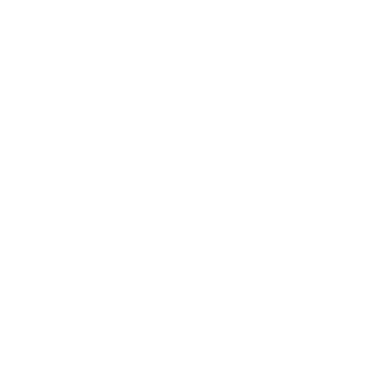

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(-L - 0.1, L + 0.1)
ax.set_ylim(-L - 0.1, L + 0.1)
line, = ax.plot([], [], 'o-', lw=2)

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(i):
    theta = solution.y[0][i]  # angle theta(t) at frame i
    x = L * np.sin(theta)     # x-position of the pendulum
    y = -L * np.cos(theta)    # y-position of the pendulum
    line.set_data([0, x], [0, y])
    return line,

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(solution.t), init_func=init,
                    interval=20, blit=True, repeat=True)

plt.show()